# Feature Selection & Preprocessing

This notebook prepares the cleaned Spotify churn dataset for modeling by performing feature selection, encoding, scaling, train-test split, and analyzing feature importance.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('cleaned_spotify_churn.csv')

#### One-Hot Encode Categorical Variables

In [2]:
df = pd.get_dummies(
    df,
    columns=['Country', 'Device', 'Subscription_Plan', 'Payment_Method'],
    prefix=['Country', 'Device', 'Plan', 'PayMethod']
)

#### Create Binary Target Column and Drop Text Target

In [3]:
df['Churn_Binary'] = df['Churn'].map({'Yes': 1, 'No': 0})
df.drop('Churn', axis=1, inplace=True)

#### Standardize Numeric Features

In [4]:
numeric_cols = ['Age', 'Subscription_Length_Months', 'Monthly_Active_Days', 'Avg_Session_Duration_Min', 'Num_Songs_Streamed', 'Num_Failed_Payments']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

#### Train-Test Split

In [5]:
X = df.drop('Churn_Binary', axis=1)
y = df['Churn_Binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (7428, 30)
Testing set shape: (1858, 30)


#### Feature Importance Analysis

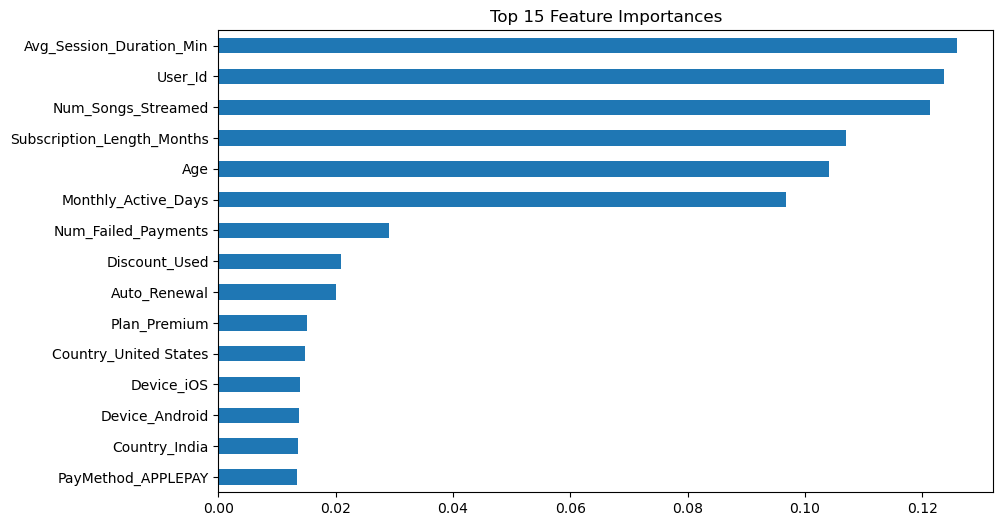

In [6]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot top 15 features
plt.figure(figsize=(10,6))
importances.head(15).plot(kind='barh')
plt.title("Top 15 Feature Importances")
plt.gca().invert_yaxis()
plt.show()